# <a href="https://miptstats.github.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 1. Простой анализ данных.

**Правила, <font color="red">прочитайте внимательно</font>:**


* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины. Правила переноса дедлайнов определены в презентации с первого занятия.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Задачи 1 и 2 сдаются в систему Яндекс.Контест. Ссылка на контест в телеграм-боте.


**Сдача задачи 3:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds24_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Прислать нужно **ноутбук в формате `ipynb`**.
* Телеграм не разрешает боту получать файлы более **20 Мб**. Если ваше решение весит больше, *заранее* разделите ноутбук на несколько.
* Для выполнения задания **используйте этот ноутбук в качестве основы, ничего не удаляя из него**. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.

**Перед выполнением задания посмотрите презентацию по выполнению и оформлению домашних заданий с занятия 1.**

---

**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash; 10 баллов
* Задача 2 &mdash; 10 баллов
* Задача 3 &mdash; 80 баллов


Баллы учитываются в <b>обязательной части</b> курса и не влияют на оценку по факультативной части.

In [1]:
# Bot check

# HW_ID: fpmi_ad1
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid', font_scale=1.3, palette='Set2')

### <font color="blue"><i>Легкая часть</i></font>

### Задача 1.

Условие задачи и сдача в системе Яндекс.Контест. Ссылка на контест в телеграм-боте.

---
### Задача 2.

Условие задачи и сдача в системе Яндекс.Контест. Ссылка на контест в телеграм-боте.

---
### Задача 3.

Титаник был крупнейшим пассажирским судном в 1912—1913 годах. Во время первого рейса затонул в северной Атлантике, столкнувшись с айсбергом в ночь с 14 на 15 апреля 1912 года, при этом погибло 1502 из 2224 пассажиров и членов экипажа. Данные о пассажирах были собраны в таблицы, которые можно скачать с <a href="https://www.kaggle.com/c/titanic/data" target="_blank">Kaggle</a>. Эти данные часто используются в качестве обучающих в анализе данных.

На дополнительном занятии 10 февраля будет показан простой пример работы с датасетом Титаник. Сейчас ваша задача &mdash; на основе простого анализа предоставленных данных обучить несколько классификаторов для определения выживших, иначе говоря, получить некоторые приближенные правила определения, выжил пассажир или нет, а также сравнить эти правила по качеству приближения.

#### 1. Подготовка данных

Загрузите данные с помощью `pandas`.

In [4]:
titanic_dataframe = pd.read_csv("./titanic/train.csv", sep=',', index_col="PassengerId")
titanic_dataframe.shape

(891, 11)

Разделите данные по строкам на две части случайным образом в соотношении 7:3. Первую часть мы будем называть *обучающей*, а вторую &mdash; *тестовой*.

In [5]:
# Перемешиваем случайным образом числа из диапазона [1, размер выборки]
indexes = np.arange(1, len(titanic_dataframe) + 1)
np.random.shuffle(indexes)

# Непосредственно делим данные на обучающие и тестовые случайным образом в отношении 7:3
train_sample = titanic_dataframe.loc[indexes[:(len(indexes) // 10) * 7]]
test_sample = titanic_dataframe.loc[indexes[(len(indexes) // 10) * 7:]]

assert len(test_sample) + len(train_sample) == len(titanic_dataframe)

Из каждой части оставим несколько признаков, с которыми мы будем работать, а также отдельно &mdash; целевой признак. Примените к обеим частям таблицы функцию ниже

In [6]:
features_columns = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
target_column = 'Survived'  # Целевой признак

def get_features_and_target(data):
    # Удалим строчки с отсутствующими данными об исследуемых признаках
    clear_data = data.dropna(subset=features_columns)
    
    features = clear_data[features_columns]
    target = clear_data[target_column]
    return features, target

In [7]:
train_features, train_target = get_features_and_target(train_sample)
test_features, test_target = get_features_and_target(test_sample)

#### 2. Исследование

**Внимание.** Эта часть задачи должна выполняться *исключительно на обучающих данных*. За использование тестовых данных решение не будет оценено.

Проведите визуальный анализ данных чтобы понять, как различные признаки влияют на целевой. Исследовать можно не целиком обучающие данные, а разделить их на две части по одному из признаков, а далее рассматривать каждую часть отдельно. 

*Не забывайте про информативность и эстетичность графиков.*

Поскольку группы людей с различными отличительными признаками могут соотноситься неравномерно, для всех признаков будем смотреть на процент выживаемости, а не на количество выживших членов экипажа.

Для начала рассмотрим процент выживших по каждому полу.

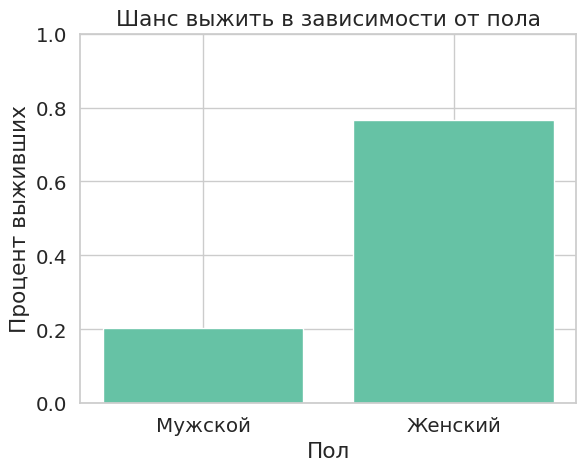

In [8]:
mask_survived = (train_target == 1)
mask_sex = (train_features.Sex == "male")

x = ["Мужской", "Женский"]
y = [
    len(train_features[mask_sex & mask_survived]) / len(train_features[mask_sex]),
    len(train_features[~mask_sex & mask_survived]) / len(train_features[~mask_sex])
]

plt.figure()
plt.title("Шанс выжить в зависимости от пола")
plt.xlabel("Пол")
plt.ylabel("Процент выживших")
plt.ylim(0, 1)
plt.bar(x, y)
plt.show()

Как можно заметить, процент выживших женщин значительно превышает количество выживших мужчин.

Проведем два исследования на благосостояние пассажира. Для начала сравним по ценовой категории билета: выше среднего и ниже.

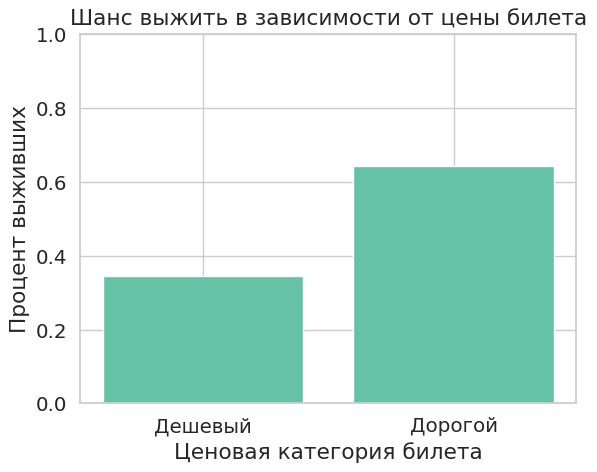

In [9]:
mean_fare = train_features.Fare.mean()
mask_fare = (train_features.Fare <= mean_fare)

x = ["Дешевый", "Дорогой"]
y = [
    len(train_features[mask_fare & mask_survived]) / len(train_features[mask_fare]),
    len(train_features[~mask_fare & mask_survived]) / len(train_features[~mask_fare])
]

plt.figure()
plt.title("Шанс выжить в зависимости от цены билета")
plt.xlabel("Ценовая категория билета")
plt.ylabel("Процент выживших")
plt.ylim(0, 1)
plt.bar(x, y)
plt.show()

А теперь сравним типы билетов

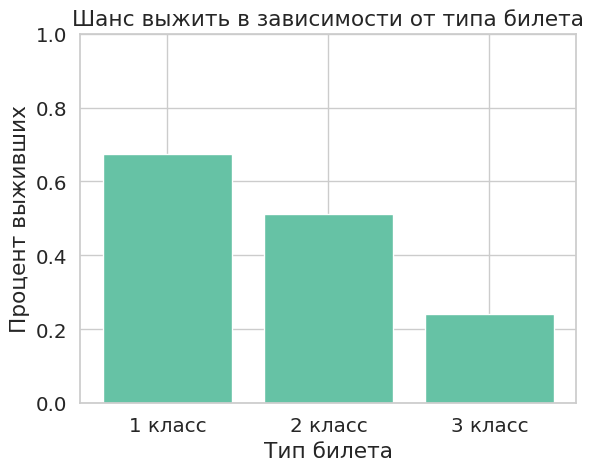

In [10]:
x = ["1 класс", "2 класс", "3 класс"]
y = [
    len(train_features[(train_features.Pclass == i) & mask_survived]) /
    len(train_features[(train_features.Pclass == i)]) for i in range(1, 4)
]

plt.figure()
plt.title("Шанс выжить в зависимости от типа билета")
plt.xlabel("Тип билета")
plt.ylabel("Процент выживших")
plt.ylim(0, 1)
plt.bar(x, y)
plt.show()

Похоже на то, что ценовая категория билета и места довольно значительно влияла на шанс спастись.

Напоследок, давайте рассмотрим, кто чаще спасался: молодые пассажиры или те, кто старше?

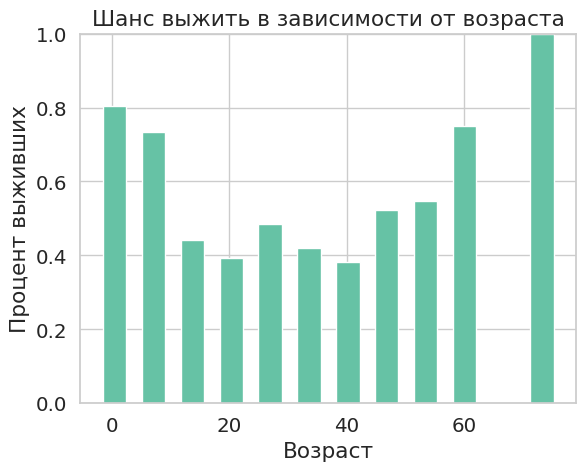

In [11]:
BINS_COUNT = 12

age_to_survive = (train_features.Age[mask_survived].value_counts() /
                  train_features.Age.value_counts())

# Делим на BINS_COUNT промежутков, на которых посчитаем среднее значение
x = np.linspace(age_to_survive.index.min(), age_to_survive.index.max(), BINS_COUNT + 1)
y = [age_to_survive[
         (x[i - 1] < age_to_survive.index) & (age_to_survive.index <= x[i])
     ].mean() for i in range(1, len(x))]

plt.figure()
plt.title("Шанс выжить в зависимости от возраста")
plt.xlabel("Возраст")
plt.ylabel("Процент выживших")
plt.ylim(0, 1)
plt.bar(x[:-1], y, width=4)
plt.show()

Из вида графика можно предположить, что шанс спастись у людей среднего возраста был ниже, чем у молодых и пожилых.

Мы проанализировали вид графиков и уже можем сделать некоторые предположения о связи таких показателей, как возраст, пол и цена билета с шансом выжить. Проверим идеи на практике.

#### 3. Классификация методом ближайшего соседа

Ранее в контесте вы уже реализовали функцию поиска ближайших соседей. Теперь давайте применим ее для решения нашей текущей задачи. 

Реализуйте функцию, которая для каждого объекта тестового набора данных найдет $k$ ближайших соседей из обучающего набора данных, и в качестве ответа возьмет наиболее часто встречающееся значение целевого признака среди найденных соседей. Обратите внимание, что соседей необходимо искать только среди объектов обучающего набора данных.

In [12]:
def find_nearest_points(A: np.ndarray, B: np.ndarray, k: int) -> np.ndarray:
    distances = np.sum((A[:, np.newaxis, :] - B) ** 2, axis=2).T
    sorted_distance = np.argsort(distances, axis=1)
    
    return sorted_distance[:, :k] # Индексы точек в массиве A, индексация с 0

In [13]:
def knn(features: pd.DataFrame,
        train_features: pd.DataFrame,
        train_target: pd.Series,
        k=1) -> pd.Series:
    """
    Предсказание целевого признака для данных features -- pandas-таблица данных.
    на основе обучающего набора данных train_features, train_target.
    Возвращает pandas.Series с теми же индексами, что и у features.
    Число k -- количество соседей.
    """
    
    # Отказываемся от индексов по PassengerId
    nearest_points = find_nearest_points(
        train_features[["Age", "Fare"]].to_numpy(),
        features[["Age", "Fare"]].to_numpy(),
        k
    ) # Ответ содержит индексы по порядковому номеру
    
    predicted = pd.Series(name="Survived", index=features.index)
    for i, row in enumerate(nearest_points):
        predicted.iloc[i] = train_target.iloc[row].mode()[0]
    
    return predicted

Постройте классификатор методом ближайшего соседа, используя только признаки `Age` и `Fare`. 

Какую метрику (функцию расстояния) вы при этом используете? Нужно ли предварительно что-то сделать с признаками?

Используется обычная евклидова метрика на пространстве размерности 2.
 
Во-первых, следует очистить данные от пропусков. Во вторых, чтобы результаты были более честными, следует нормировать признаки так, чтобы изменение цены и возраста приводили к изменению расстояния в одинаковой степени. Допустим взять за единицу измерения средний `Age` и `Fare` соответственно.

Как меняется результат классификации при другом количестве соседей? Рассмотрите хотя бы три различных нечетных значения количества соседей.

In [14]:
def matches_percentage(classifier: pd.Series, target: pd.Series) -> int:
    """Функция возвращает процент правильных ответов"""
    return (classifier == target).value_counts().loc[True] / len(target)

knn3 = knn(test_features, train_features, train_target, 3)
knn23 = knn(test_features, train_features, train_target, 23)
knn53 = knn(test_features, train_features, train_target, 53)
knn157 = knn(test_features, train_features, train_target, 157)

(matches_percentage(knn3, test_target), matches_percentage(knn23, test_target),
 matches_percentage(knn53, test_target), matches_percentage(knn157, test_target))

(0.6097560975609756,
 0.7024390243902439,
 0.6634146341463415,
 0.6780487804878049)

С увеличением количества соседей точность классификации увеличивается, но процент совпадений все равно оставляет желать лучшего. Кроме того, нельзя брать слишком много соседей, в таком случае качество классификации вновь начнет понижаться.

Как можно было бы учесть другие признаки? Какие при этом могут возникнуть проблемы? 

Можно было бы нормировать другие признаки и использовать их совместно с `Age` и `Fare`. Первая проблема заключается в том, что некоторые признаки, например `Sex` и  `Pclass` являются не числовыми, таким типовым параметрам нужно будет как-то присвоить значения на числовой оси. Вторая проблема заключается в нормировке. Числовые признаки тоже не следует использовать в их непосредственном виде, обычная евклидова метрика будет в равной степени учитывать изменение и цены билета и возраста, что, очевидно, несправедливо.

Строить классификатор с другими признаками при этом не нужно.

#### 4. Классификация логическими правилами

На основе выше проведенного исследования предложите два разных правила в виде решающего дерева, пример которого можете посмотреть в презентации с первой лекции (классификация котиков). Никакие статистические методы использовать не требуется, только логику и графики.

В данной задаче достаточно, если первое дерево будет иметь максимальную глубину 2, а второе &mdash; глубину 1, и при этом не является поддеревом первого. *Примечание*: дерево из одного листа имеет глубину 0.

Опираясь на вид графиков, выведенных в пункте 2, можем построить 2 решающих дерева.

**Дерево 1:**

Для первого дерева выберем наиболее значимые отличия: пол пассажира и цена билета. 
1) Смотрим на пол человека: женщина - наверняка выжила, мужчина - спускаемся дальше
2) Смотрим на цену билета: выше средней - выжил, иначе - нет

**Дерево 2:**

Во втором дереве рассмотрим только цену билета и его тип.
1) Смотрим на тип билета: 3 класс - умер, иначе смотрим на среднюю цену
2) Цена выше средней? Тогда выжил, иначе - нет

Реализуйте полученные деревья по шаблону

In [15]:
def first_tree(features):
    """
    Предсказание целевого признака для данных features -- pandas-таблица данных.
    Возвращает pandas.Series с теми же индексами, что и у features.
    """
    
    predicted = pd.Series(0, name="Survived", index=features.index)
    predicted[features.Sex == "female"] = 1
    predicted[features.Fare > mean_fare] = 1
    
    return predicted

In [16]:
def second_tree(features):
    """
    Предсказание целевого признака для данных features -- pandas-таблица данных.
    Возвращает pandas.Series с теми же индексами, что и у features.
    """
    
    predicted = pd.Series(0, name="Survived", index=features.index)
    predicted[features.Fare > mean_fare] = 1
    predicted[features.Pclass == 3] = 0
    
    return predicted

#### 5. Качество

Вспомним, что у нас имеется тестовая часть выборки. Самое время ее использовать для того, чтобы оценить, насколько хорошими получились деревья. Предложите какой-нибудь критерий качества.

*Замечание*. Не стоит пытаться искать, какие критерии существуют. В данном случае легко предложить адекватный критерий. Стандартные критерии мы разберем позже, но для начала лучше подумать самостоятельно.

**Критерий:**

В качестве критерия в данном случае можно взять процент правильных ответов, которые алгоритмы выдают на тестовой выборке.

Реализуйте данный критерий по шаблону

In [17]:
def criteria(target, predicted):
    """
    Вычисление критерия качества для предсказания predicted, 
    если истинные значения -- target.
    Возвращает одно вещественное число.
    """
    return matches_percentage(predicted, target) # Эту функцию мы уже реализовывали ранее

Оцените качество построенных ранее моделей (два дерева, kNN), используя предложенный критерий.

*Примечание.* Полученные значения не влияют на оценку по задание. Оценивается только корректность и обоснованность решения, а также графики и выводы.

In [18]:
(criteria(test_target, first_tree(test_features)),
 criteria(test_target, second_tree(test_features)),
 criteria(test_target, knn23))

(0.7170731707317073, 0.6829268292682927, 0.7024390243902439)

Как можно видеть, наилучший результат показывает первое дерево по полу пассажира и цене билета.

Посчитайте значение предложенного ранее критерия качества для метода ближайшего соседа для значений $k$ от 1 до 10. Постройте график зависимости критерия качества от $k$. Как вы можете пояснить полученные результаты?

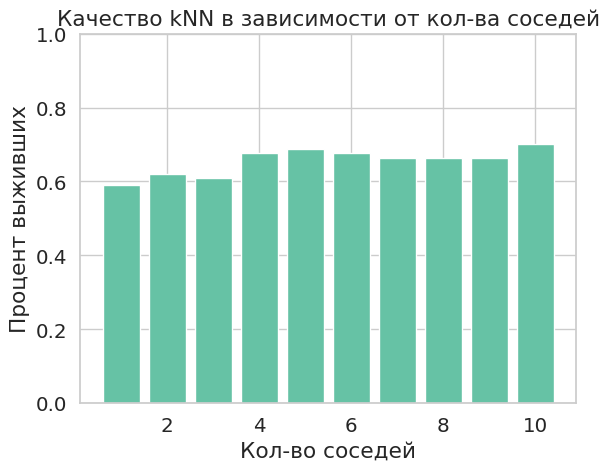

In [19]:
x = [i for i in range(1, 11)]
y = [criteria(test_target, knn(test_features, train_features, train_target, i)) for i in range(1, 11)]

plt.figure()
plt.title("Качество kNN в зависимости от кол-ва соседей")
plt.xlabel("Кол-во соседей")
plt.ylabel("Процент выживших")
plt.ylim(0, 1)
plt.bar(x, y)
plt.show()

Как видно, процент правильных ответов увеличивается с увеличением параметра k (снижается количество случайных ошибок из-за недостаточного количества информации о соседях), но рост очень медленный.
Можно предположить, что это связано с тем, что двух выбранных критериев недостаточно для точной оценки и даже при оптимальном выборе количества ближайших соседей, хорошей точности добиться не выйдет.

#### 6. Выводы

В ходе работы над задачей определения, выжил ли пассажир Титаника или нет, были выявлены признаки, влияющие на фактор выживаемости, а именно: возраст и пол пассажира, цена и тип его билета (пункт 2). На основе выявленных зависимостей, были построены три классификатора: 2 решающих дерева и 1 алгоритм поиска ближайших соседей (пункт 3 и 4). Наиболее удачным классификатором оказалось решающее дерево, анализирующее пол пассажира и цену его билета (пункт 5). Таким образом, одними из главных отличительных признаков выживших пассажиров оказались преобладание женского пола и дорогая плата за поездку.